In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import yaml

In [2]:
data_dir = "../analysis/results"

In [21]:
def plot(input_file):
    with open(os.path.join(data_dir, input_file)) as fin:
        data = yaml.load(fin, Loader=yaml.CLoader)
    G = nx.DiGraph()
    data_centers = range(5)
    user_locations = range(5, 13)
    forwarding_matrix = np.array(data["forwarding_probability_matrix"])
    forwarding_matrix = np.round(forwarding_matrix, decimals=2)

    for data_center in data_centers:
        G.add_node(data_center)
    for user_loc in user_locations:
        G.add_node(user_loc)
    for (i, row) in enumerate(forwarding_matrix):
        user_loc = 5 + i
        for (data_center, p) in enumerate(row):
            if p > 1e-3:
                G.add_edge(user_loc, data_center, weight=p)

    pos = {0: np.array([0, 0])}
    for i in range(1, 5):
        pos[i] = np.array([0.7 * np.cos(2 * np.pi * (i - 1) / 4), 0.7 * np.sin(2 * np.pi * (i - 1) / 4)])
    for i in range(5, 13):
        pos[i] = np.array([np.cos(2 * np.pi * (i - 5) / 8), np.sin(2 * np.pi * (i - 5) / 8)])

    capacity = { data_center: capacity for (data_center, capacity) in zip(data_centers, data["allocation_vector"])}

    plt.figure(figsize=(5, 5))
    nx.draw_networkx_nodes(G, pos, nodelist=data_centers, node_color="red", node_shape="s", label="data center")
    nx.draw_networkx_nodes(G, pos, nodelist=user_locations, node_color="green", label="user_location")
    nx.draw_networkx_labels(G, pos, labels=capacity)
    for edge in G.edges(data='weight'):
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=5 * edge[2])
    edge_labels = {e: w for (e, w) in nx.get_edge_attributes(G, "weight").items() if w != 1}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)
    plt.legend()
    plt.savefig(f"ring_edge_{os.path.splitext(input_file)[0]}.png")


/tmp/ipykernel_11132/1705970132.py:33: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[edge], width=5 * edge[2])


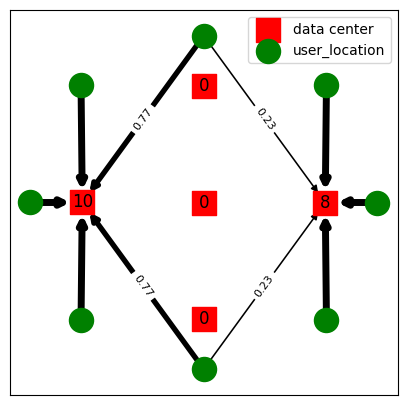

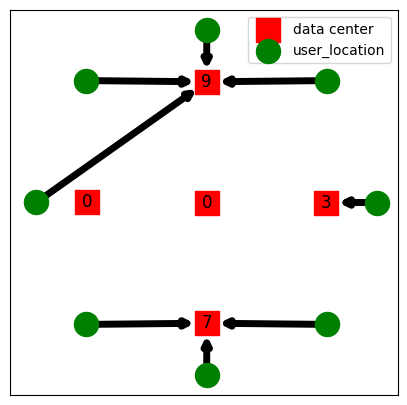

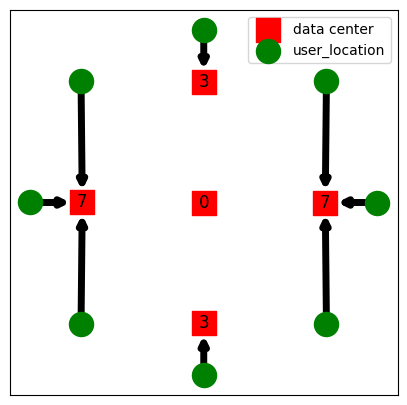

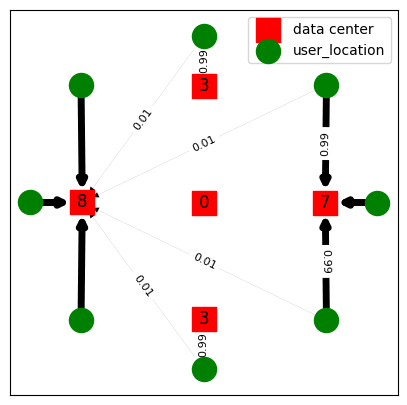

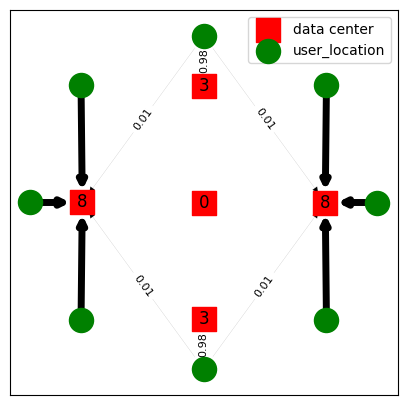

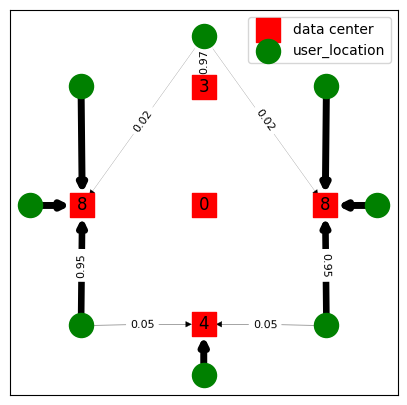

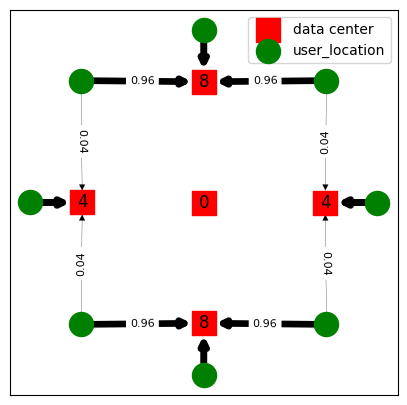

In [23]:
for input_file in os.listdir(data_dir):
    if os.path.splitext(input_file)[0].endswith("knitro1"):
        plot(input_file)